# Comprehensive Assessment : Deep Learning - Predicting Diabetes Progression using Artificial Neural Networks


Objective:
You are required to model the progression of diabetes using the available independent variables. This model will help healthcare professionals understand how different factors influence the progression of diabetes and potentially aid in designing better treatment plans and preventive measures. The model will provide insights into the dynamics of diabetes progression in patients.


## 1.Loading and Preprocessing


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


In [5]:
#load dataset
data = load_diabetes()

#convert to dataframe
df = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target)
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [6]:
#check for missing values
missing_values = df.isnull().sum()

if missing_values.any():
    print("Missing values detected :\n",missing_values)
    #handle missing values(if any for example, filling with mean)
    df.fillna(df.mean(),inplace=True)
else:
    print("No missing values detected")

No missing values detected


In [7]:
#Normalise features
scaler = StandardScaler()
x_normalized = scaler.fit_transform(df)

#display summary for normalized features
print(pd.DataFrame(x_normalized,columns=data.feature_names).describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -8.037814e-18  2.290777e-16  2.009453e-17 -1.607563e-17  8.037814e-18   
std    1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00  1.001133e+00   
min   -2.254290e+00 -9.385367e-01 -1.897929e+00 -2.363050e+00 -2.665411e+00   
25%   -7.841722e-01 -9.385367e-01 -7.196249e-01 -7.706500e-01 -7.200196e-01   
50%    1.131724e-01 -9.385367e-01 -1.531324e-01 -1.192138e-01 -9.084100e-02   
75%    8.005001e-01  1.065488e+00  6.569519e-01  7.493678e-01  5.961931e-01   
max    2.327895e+00  1.065488e+00  3.585718e+00  2.776058e+00  3.235851e+00   

                 s2            s3            s4          s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  442.000000  4.420000e+02  
mean   4.018907e-18 -4.018907e-18  2.330966e-16    0.000000 -4.018907e-17  
std    1.001133e+00  1.001133e+00  1.001133e+00    1.001133 

# 2.Exploratory Data Analysis (EDA) 

Perform EDA to understand the distribution of features and the target variable.
Visualize the relationships between features and the target variable.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#descriptive statistics
print(df.describe)

<bound method NDFrame.describe of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -

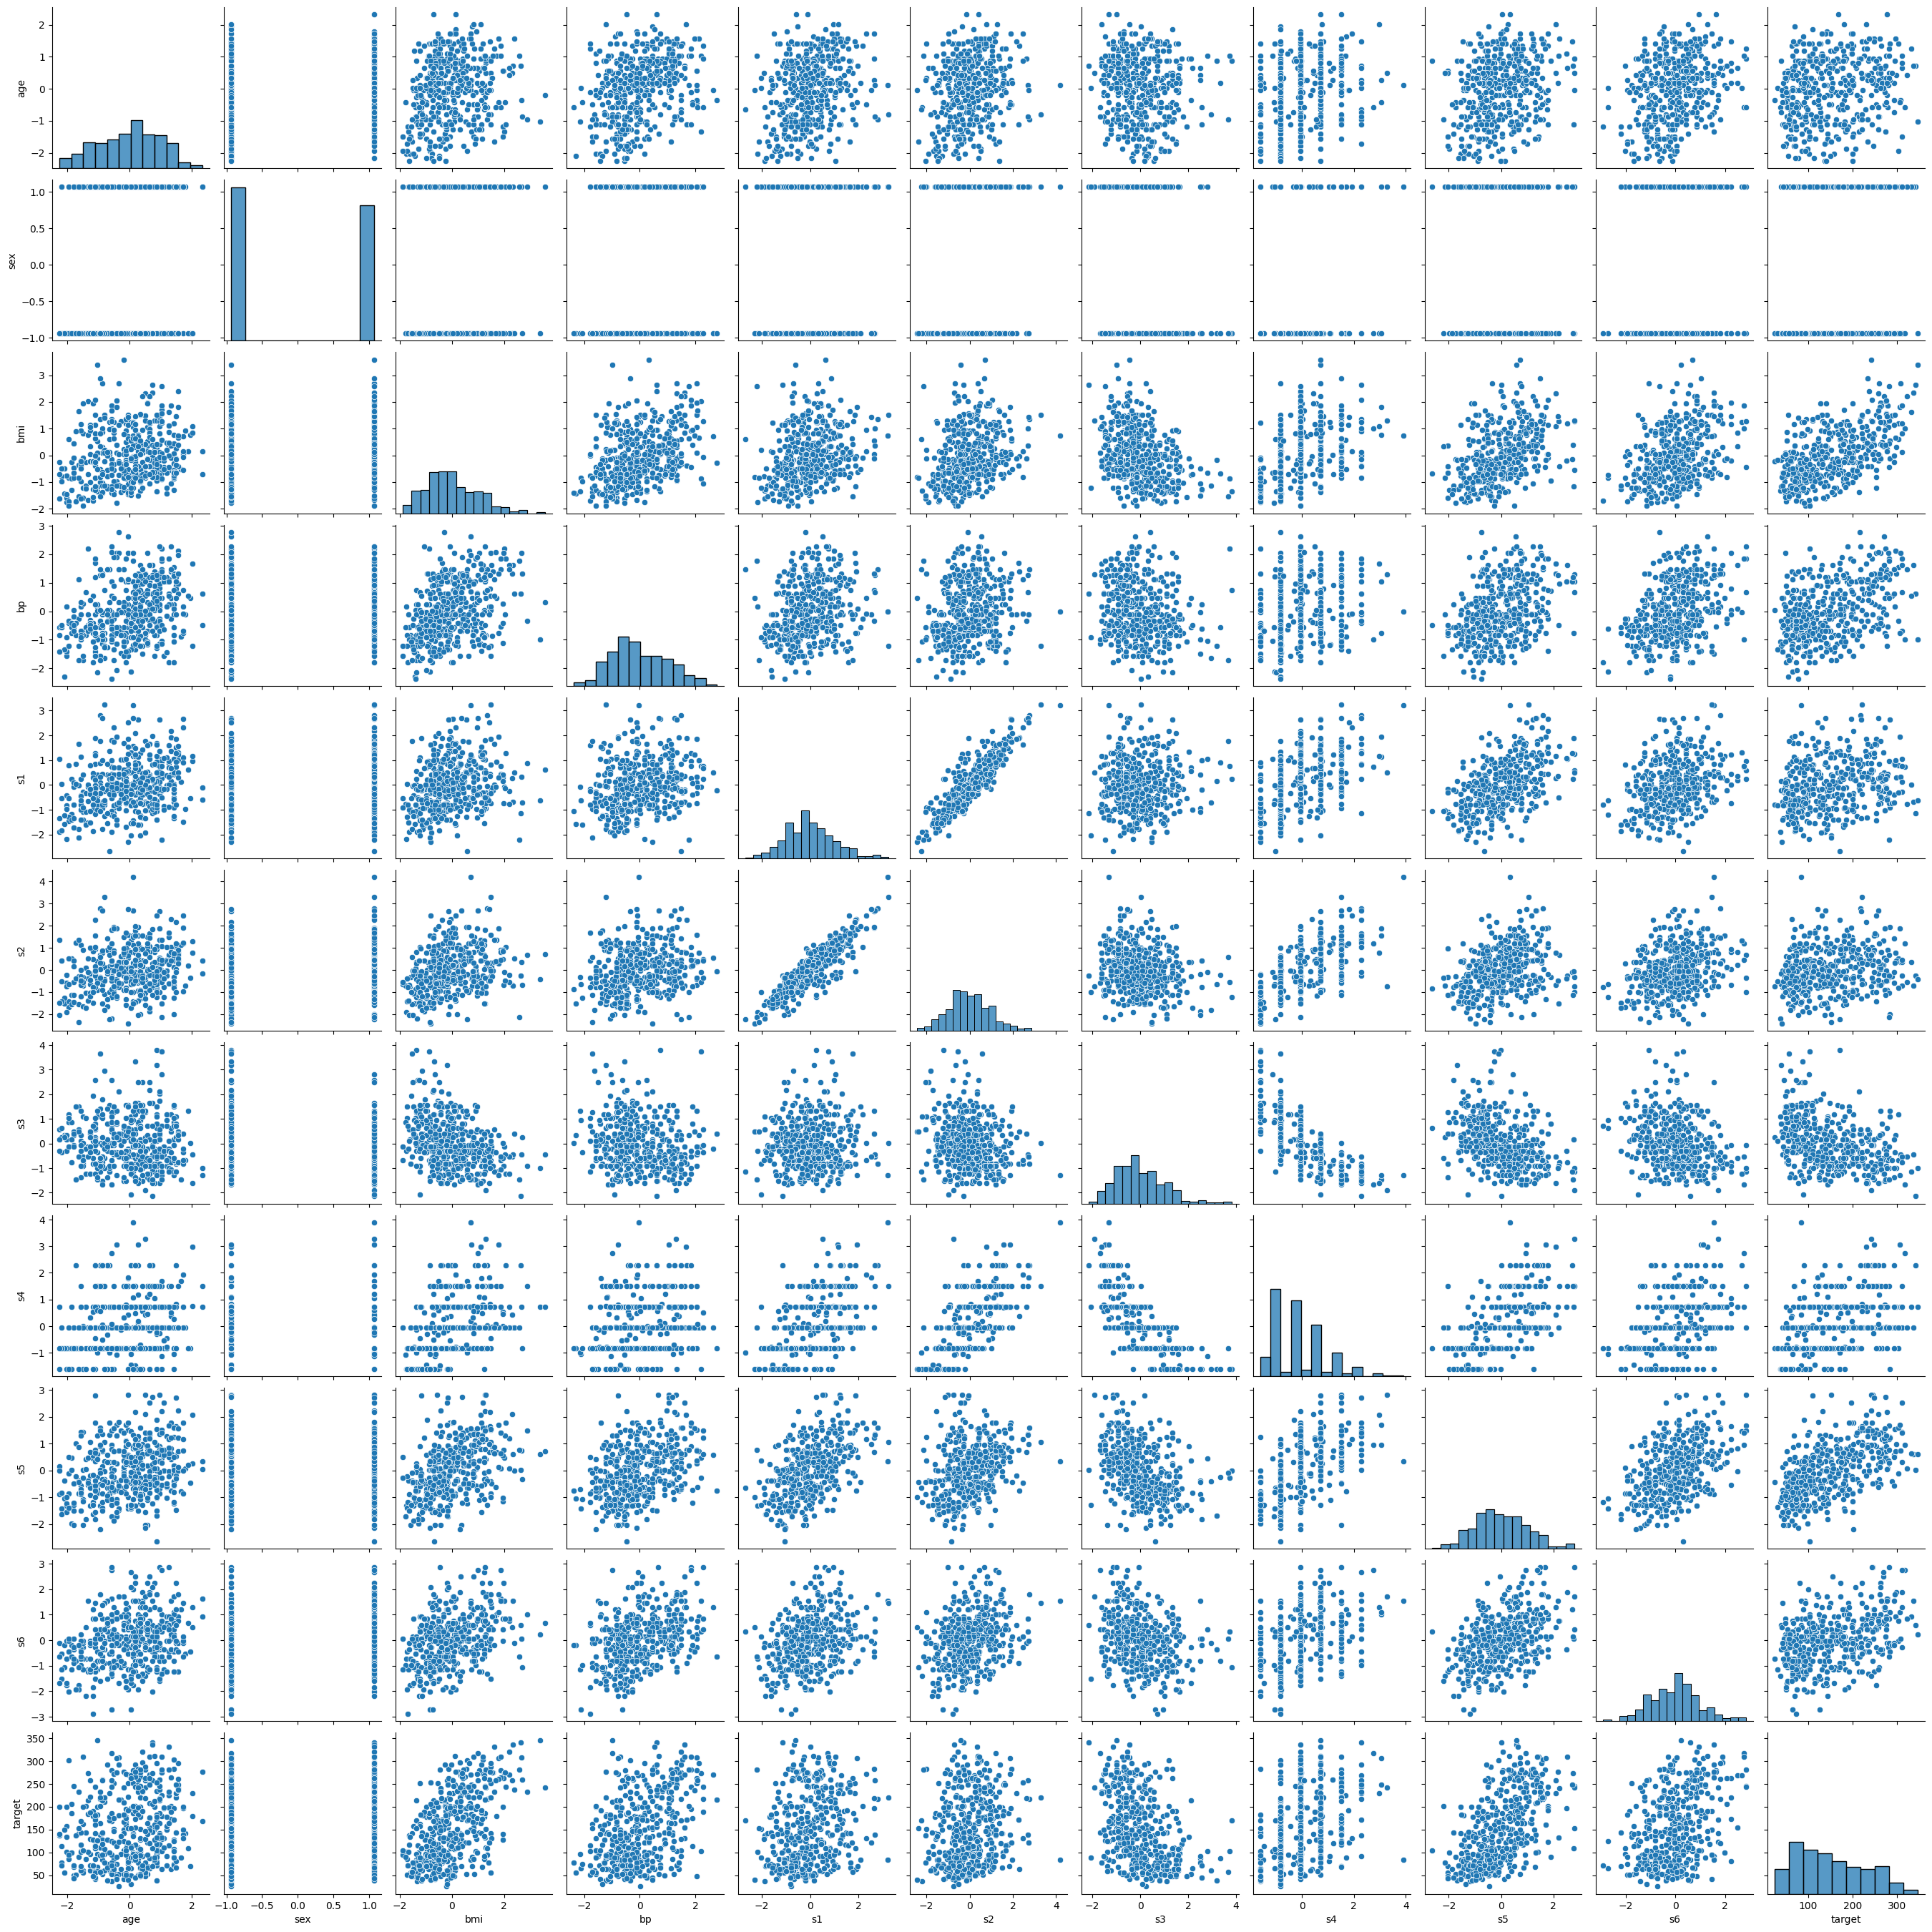

In [9]:
# Create visualizations such as histograms, box plots, or pair plots to explore relationships.

# Pairplot
sns.pairplot(pd.concat([pd.DataFrame(x_normalized,columns=data.feature_names),y.rename("target")],axis=1))
plt.show()

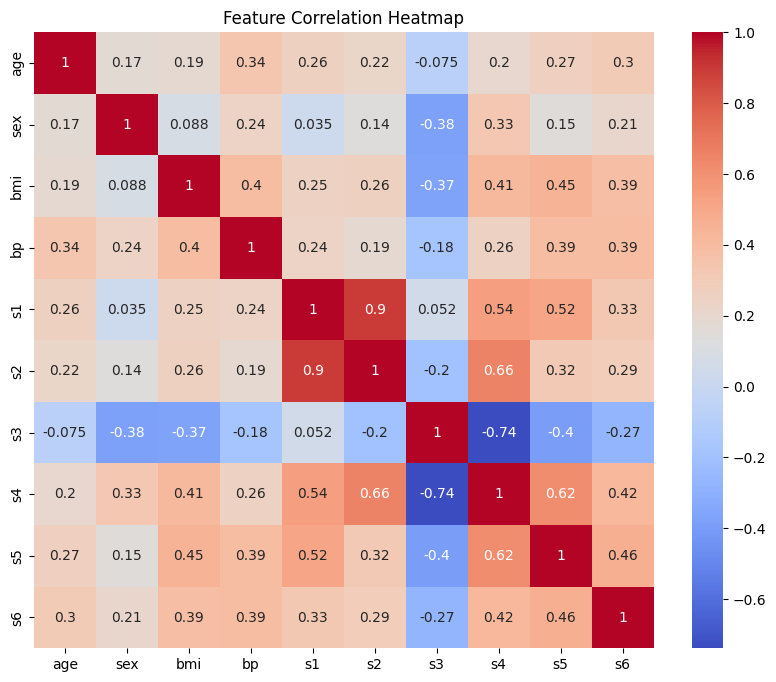

In [10]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(x_normalized, columns=data.feature_names).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# 3.Building the ANN Model
Design a simple ANN architecture with at least one hidden layer.
Use appropriate activation functions .



Use TensorFlow/Keras or PyTorch to define the ANN model.
Include at least one hidden layer with appropriate activation functions (e.g., ReLU).
Add an output layer suited for regression tasks.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from keras.models import Sequential
from keras.layers import Dense

In [11]:
# Define the model
model = Sequential([
    Dense(64, input_dim=x_normalized.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Summary of the model
model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

# 4.Training the ANN Model 

Split the dataset into training and testing sets.
Train the model on the training data.
Use an appropriate loss function and optimizer.

In [15]:
# Split the dataset into training and testing sets using train_test_split.

from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.2, random_state=42)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 32385.5000 - mse: 32385.5000 - val_loss: 22421.0801 - val_mse: 22421.0801
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30264.4766 - mse: 30264.4766 - val_loss: 22277.2188 - val_mse: 22277.2188
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30352.1133 - mse: 30352.1133 - val_loss: 22127.8965 - val_mse: 22127.8965
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32853.7344 - mse: 32853.7344 - val_loss: 21954.9023 - val_mse: 21954.9023
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33535.9297 - mse: 33535.9297 - val_loss: 21745.9453 - val_mse: 21745.9453
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27689.7559 - mse: 27689.7559 - val_loss: 21491.1797 - val_mse: 21491.1797
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30361.7500 - mse: 30361.7500 - val_loss: 21166.5391 - val_mse: 21166.5391
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29203.8633 - mse: 29203.8

# 5.Evaluating the Model 

Evaluate the model on the testing data.
Report the performance metrics (e.g., Mean Squared Error, R² Score).

In [17]:
#Evaluate the model on the testing data using appropriate metrics such as Mean Squared Error (MSE) and R² Score.

from sklearn.metrics import mean_squared_error, r2_score
# Predictions
y_pred = model.predict(X_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error: 2995.35
R² Score: 0.43


# 6.Improving the Model 

Experiment with different architectures, activation functions, or hyperparameters to improve the model performance.
Report the changes made and the corresponding improvement in performance.

In [18]:
#Experiment with additional hidden layers, different numbers of neurons, or alternative activation functions (e.g., tanh).

# Adjust learning rates, batch sizes, or epochs.

# Compare the performance metrics after each change.

# Modified model with additional hidden layers
improved_model = Sequential([
    Dense(128, input_dim=x_normalized.shape[1], activation='relu'),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

improved_model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mse'])

# Train the improved model
improved_history = improved_model.fit(X_train, y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the improved model
y_pred_improved = improved_model.predict(X_test)
mse_improved = mean_squared_error(y_test, y_pred_improved)
r2_improved = r2_score(y_test, y_pred_improved)

print(f"Improved Mean Squared Error: {mse_improved:.2f}")
print(f"Improved R² Score: {r2_improved:.2f}")

Epoch 1/150


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 31314.4414 - mse: 31314.4414 - val_loss: 22099.9902 - val_mse: 22099.9902
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31056.3516 - mse: 31056.3516 - val_loss: 21568.0391 - val_mse: 21568.0391
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 28994.6465 - mse: 28994.6465 - val_loss: 20747.3086 - val_mse: 20747.3086
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30456.3164 - mse: 30456.3164 - val_loss: 19614.5098 - val_mse: 19614.5098
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27830.1250 - mse: 27830.1250 - val_loss: 18280.9277 - val_mse: 18280.9277
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26754.4570 - mse: 26754.4570 - val_loss: 16911.9551 - val_mse: 16911.9551
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23354.0332 - mse: 23354.0332 - val_loss: 15577.9961 - val_mse: 15577.9961
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25661.3867 - mse: 256

MSE being relatively high and R² being low indicates that the model isn’t capturing the underlying patterns of the data well. The model might need improvement, either through:

Hyperparameter Tuning: You could improve performance by adjusting hyperparameters (learning rate, number of layers, number of neurons, etc.).